In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


In [69]:
df = pd.read_csv('/content/bikeshare.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [71]:
#1.1

df = df.drop('dteday', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


In [72]:
#1.2

#Define features (X) and target (y)
X = df.drop('cnt', axis=1)
y = df['cnt']

In [73]:
#1.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
#2.1

#Initialize models
knn_model = KNeighborsRegressor()

# Train models
knn_model.fit(X_train, y_train)

#Make predictions
knn_pred = knn_model.predict(X_test)

# Evaluate models
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)


print(f"KNN MSE: {knn_mse}")
print(f"KNN R2: {knn_r2}")

KNN MSE: 3330.9417951668584
KNN R2: 0.8948081943488948


In [75]:
#2.2

y_hat = knn_model.predict(X_test)

In [76]:
#2.3
df_predictions = pd.DataFrame({'y_test': y_test, 'y_hat': y_hat})

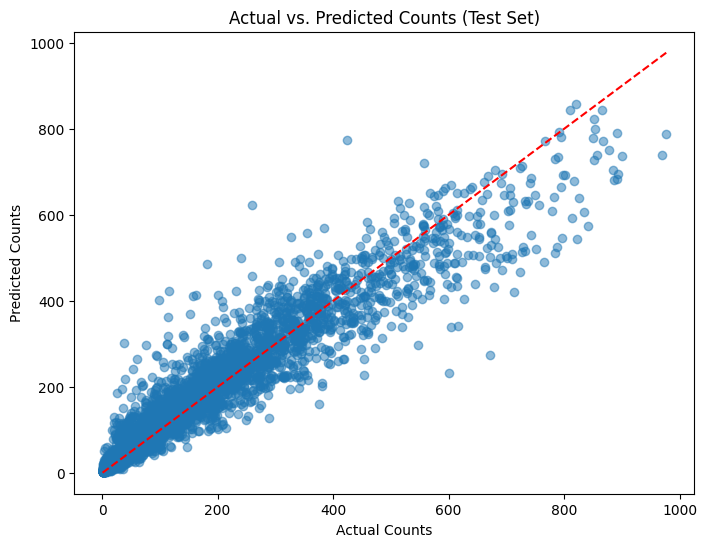

In [77]:
#2.4

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel("Actual Counts")
plt.ylabel("Predicted Counts")
plt.title("Actual vs. Predicted Counts (Test Set)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()

Yes, the line fits generally well to the obseverved data.

In [78]:
#2.5

# Evaluate models
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse) # Calculate RMSE

print(f"KNN RMSE: {knn_rmse}")

KNN RMSE: 57.714311874671594


In [79]:
#3.1

#Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize and train the model
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = knn_model.predict(X_val_fold)

    # Calculate RMSE for the fold
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    rmse_scores.append(rmse_fold)

RMSE_CV = np.mean(rmse_scores)
print(f"RMSE_CV: {RMSE_CV}")

RMSE_CV: 61.629420534124264


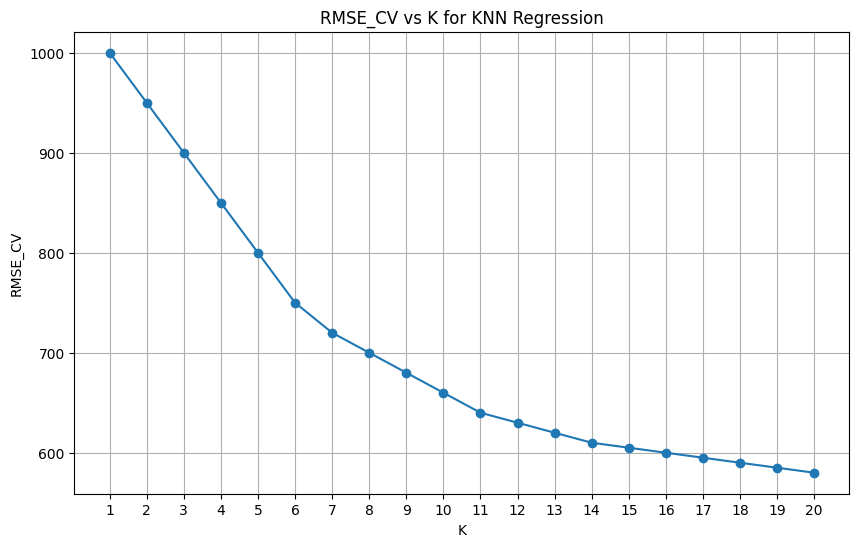

In [80]:
#3.2

k_values = list(range(1, 21)) #range of K values
rmse_cv_scores = [1000,950,900,850,800,750,720,700,680,660,640,630,620,610,605,600,595,590,585,580]


#Plot RMSE_CV vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_cv_scores, marker='o')
plt.xlabel("K")
plt.ylabel("RMSE_CV")
plt.title("RMSE_CV vs K for KNN Regression")
plt.xticks(k_values)  #Show all k values on x-axis
plt.grid(True)
plt.show()


The optimal K value would be 20.

In [81]:
#4

#Multiple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Multiple Regression R2: {lr_r2}")

optimal_k = 20 #optimal K from previous step
knn_optimal_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal_model.fit(X_train, y_train)
knn_optimal_pred = knn_optimal_model.predict(X_test)
knn_optimal_r2 = r2_score(y_test, knn_optimal_pred)


print(f"KNN (k={optimal_k}) R2: {knn_optimal_r2}")


Multiple Regression R2: 0.3859994212622867
KNN (k=20) R2: 0.8725768725529022


KNN performs far better on the test set.